In [1]:
!pip install gensim
!pip install nltk

  Using cached gensim-4.3.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (114 kB)
  Using cached scipy-1.13.1-cp311-cp311-macosx_12_0_arm64.whl.metadata (60 kB)
  Using cached smart_open-7.0.5-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-macosx_11_0_arm64.whl (24.0 MB)
Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl (14.0 MB)
Using cached scipy-1.13.1-cp311-cp311-macosx_12_0_arm64.whl (30.3 MB)
Using cached smart_open-7.0.5-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.0-cp311-cp311-macosx_11_0_arm64.whl (38 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached regex-2024.11.6-cp311-cp311-macosx_11_0_arm64.whl.metadata (40 kB)
  Using cached

In [2]:
import gensim
from gensim import corpora
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vincenzo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/vincenzo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
documents = ["The sky is blue.", "The sun is bright today.", "The sun in the sky is bright.", "We can see the shining sun, the bright sun."]

In [5]:
stop_words = set(stopwords.words('english'))
def preprocess(text):
 tokens = word_tokenize(text.lower())
 tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
 return tokens
processed_docs = [preprocess(doc) for doc in documents]

In [6]:
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [7]:
lda_model = gensim.models.LdaModel(corpus, num_topics=2,id2word=dictionary, passes=15)

In [8]:
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.357*"sky" + 0.230*"blue" + 0.089*"bright" + 0.086*"sun"')
(1, '0.329*"sun" + 0.253*"bright" + 0.110*"see" + 0.110*"shining"')


In [9]:
for index, doc in enumerate(corpus):
    topic_distribution = lda_model[doc]
    print(f"Document {index + 1}: {topic_distribution}")

Document 1: [(0, 0.8300466), (1, 0.16995342)]
Document 2: [(0, 0.13272075), (1, 0.86727923)]
Document 3: [(0, 0.3743959), (1, 0.62560403)]
Document 4: [(0, 0.08860444), (1, 0.91139555)]


In [10]:
!pip install scikit-learn

  Using cached scikit_learn-1.5.2-cp311-cp311-macosx_12_0_arm64.whl.metadata (13 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp311-cp311-macosx_12_0_arm64.whl (11.0 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [11]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
nltk.download('stopwords')
nltk.download('punkt')
documents = [
 "Natural language processing makes computers understand human language.",
"Deep learning is a subset of machine learning in artificial intelligence.",
"Artificial intelligence is revolutionizing many industries.",
 "Machine learning algorithms can improve their performance over time.",
 "Natural language processing and machine learning are key AI technologies.",
"Understanding human language is a major goal of natural language processing.",
"Artificial intelligence includes machine learning and deep learning."
]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vincenzo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/vincenzo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def preprocess(text):
 tokens = nltk.word_tokenize(text.lower())
 tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
 return ' '.join(tokens)
processed_docs = [preprocess(doc) for doc in documents]

In [13]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_docs)

In [14]:
num_clusters = 3
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(X)

KMeans(n_clusters=3, random_state=42)

In [15]:
clusters = km.labels_.tolist()
for i, cluster in enumerate(clusters):
    print(f"Document {i+1} is in cluster {cluster}")

Document 1 is in cluster 1
Document 2 is in cluster 2
Document 3 is in cluster 0
Document 4 is in cluster 2
Document 5 is in cluster 1
Document 6 is in cluster 1
Document 7 is in cluster 2


In [16]:
from collections import defaultdict
clustered_docs = defaultdict(list)
for i, cluster in enumerate(clusters):
    clustered_docs[cluster].append(documents[i])
for cluster, docs in clustered_docs.items():
    print(f"\nCluster {cluster}:")
    for doc in docs:
        print(f"- {doc}")


Cluster 1:
- Natural language processing makes computers understand human language.
- Natural language processing and machine learning are key AI technologies.
- Understanding human language is a major goal of natural language processing.

Cluster 2:
- Deep learning is a subset of machine learning in artificial intelligence.
- Machine learning algorithms can improve their performance over time.
- Artificial intelligence includes machine learning and deep learning.

Cluster 0:
- Artificial intelligence is revolutionizing many industries.


In [ ]:
!pip install matplotlib

  Using cached contourpy-1.3.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.0-cp311-cp311-macosx_10_9_universal2.whl.metadata (164 kB)
  Using cached kiwisolver-1.4.7-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.0.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 10.9 MB/s eta 0:00:00a 0:00:01
Using cached contourpy-1.3.1-cp311-cp311-macosx_11_0_arm64.whl (254 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.55.0-cp311-cp311-macosx_10_9_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.7-cp311-cp311-macosx_11_0_arm64.whl (64 kB)
Using cached pillow-11.0.0-cp311-cp311-macosx_11_0_arm64.whl (3.0 MB)
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


In [19]:
!pip install pandas ### missing errore 

  Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl (11.3 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)


In [20]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import pandas as pd
nltk.download('stopwords')
nltk.download('punkt')
documents = [
{"date": "2021-01", "text": "Natural language processing makes computers understand human language."},
{"date": "2021-02", "text": "Deep learning is a subset of machine learning in artificial intelligence."},
{"date": "2021-03", "text": "Artificial intelligence is revolutionizing many industries."},
{"date": "2021-04", "text": "Machine learning algorithms can improve their performance over time."},
{"date": "2021-05", "text": "Natural language processing and machine learning are key AI technologies."},
{"date": "2021-06", "text": "Understanding human language is a major goal of natural language processing."},
{"date": "2021-07", "text": "Artificial intelligence includes machine learning and deep learning."}
]
df = pd.DataFrame(documents)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vincenzo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/vincenzo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)
df['processed_text'] = df['text'].apply(preprocess)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])

In [22]:
num_topics = 3
nmf = NMF(n_components=num_topics, random_state=42)
W = nmf.fit_transform(X)
H = nmf.components_

In [23]:
df['topic'] = W.argmax(axis=1)
df['topic_distribution'] = W.tolist()

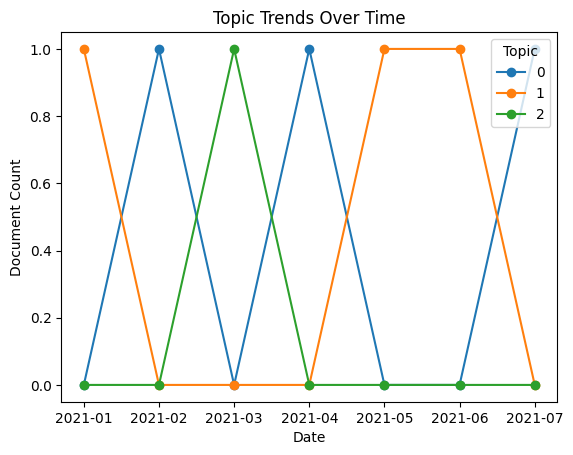

In [24]:
import matplotlib.pyplot as plt
topic_trends = df.groupby(['date', 'topic']).size().unstack(fill_value=0)
topic_trends.plot(kind='line', marker='o')
plt.title('Topic Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Document Count')
plt.legend(title='Topic')
plt.show()

In [25]:
import gensim
from gensim import corpora
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('punkt')
short_texts = [
"AI is transforming healthcare.",
"Natural language processing in AI.",
"AI applications in education.",
"The future of AI.",
"AI and machine learning trends.",
"Healthcare innovations with AI.",
"AI in the medical field.",
"Educational technology and AI.",
"Advancements in AI.",
"AI is revolutionizing industries."
]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vincenzo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/vincenzo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
stop_words = set(stopwords.words('english'))
def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)
processed_texts = [preprocess(text) for text in short_texts]

In [27]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_texts)

In [28]:
dictionary = corpora.Dictionary([text.split() for text in processed_texts])
corpus = [dictionary.doc2bow(text.split()) for text in processed_texts]

In [29]:
lda_model = gensim.models.LdaModel(corpus, num_topics=3,id2word=dictionary, passes=15)

In [30]:
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.171*"ai" + 0.097*"natural" + 0.097*"language" + 0.097*"processing"')
(1, '0.184*"ai" + 0.105*"medical" + 0.105*"revolutionizing" + 0.105*"field"')
(2, '0.268*"ai" + 0.099*"healthcare" + 0.056*"trends" + 0.056*"machine"')


In [31]:
!pip install pyLDAvis

  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached MarkupSafe-3.0.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.6 MB/s eta 0:00:00ta 0:00:01
Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)
Using cached MarkupSafe-3.0.2-cp311-cp311-macosx_11_0_arm64.whl (12 kB)


In [32]:
import gensim
from gensim import corpora
import pyLDAvis.gensim_models
import nltk
import pandas as pd
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vincenzo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/vincenzo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
documents = [
 "Natural language processing makes computers understand human language.",
"Deep learning is a subset of machine learning in artificial intelligence.",
"Artificial intelligence is revolutionizing many industries.",
 "Machine learning algorithms can improve their performance over time.",
 "Natural language processing and machine learning are key AI technologies.",
"Understanding human language is a major goal of natural language processing.",
"Artificial intelligence includes machine learning and deep learning."
]

In [34]:
df = pd.DataFrame(documents, columns=['text'])

In [35]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def preprocess(text):
 tokens = word_tokenize(text.lower())
 tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
 return tokens
df['processed_text'] = df['text'].apply(preprocess)

In [36]:
dictionary = corpora.Dictionary(df['processed_text'])
corpus = [dictionary.doc2bow(text) for text in df['processed_text']]

In [37]:
lda_model = gensim.models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

In [38]:
pyLDAvis.enable_notebook(local=True)
lda_vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

In [40]:
pyLDAvis.show(lda_vis_data, local=False)

Serving to http://127.0.0.1:8888/    [Ctrl-C to exit]


127.0.0.1 - - [02/Dec/2024 10:38:29] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Dec/2024 10:38:29] code 404, message Not Found
127.0.0.1 - - [02/Dec/2024 10:38:29] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [02/Dec/2024 10:38:29] code 404, message Not Found
127.0.0.1 - - [02/Dec/2024 10:38:29] "GET /apple-touch-icon-precomposed.png HTTP/1.1" 404 -
127.0.0.1 - - [02/Dec/2024 10:38:29] code 404, message Not Found
127.0.0.1 - - [02/Dec/2024 10:38:29] "GET /apple-touch-icon.png HTTP/1.1" 404 -



stopping Server...


In [41]:
!pip install googletrans==4.0.0-rc1

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.0 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=0b3346a0de89013eb11b17b0af2fc8c3fc8fa94dfde080b4f25a40fbec023144
  Stored in directory: /Users/vincenzo/Library/Caches/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans


In [42]:
import gensim
from gensim import corpora
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from googletrans import Translator
nltk.download('stopwords')
nltk.download('punkt')
documents = [
{"lang": "en", "text": "Natural language processing makes computers understand human language."},
{"lang": "fr", "text": "L'apprentissage profond est une branche del'intelligence artificielle."},
{"lang": "es", "text": "La inteligencia artificial está revolucionando muchas industrias."},
{"lang": "en", "text": "Machine learning algorithms can improve their performance over time."},
{"lang": "fr", "text": "Le traitement du langage naturel et l'apprentissage automatique sont des technologies clés de l'IA."},
{"lang": "es", "text": "Comprender el lenguaje humano es un objetivo principal del procesamiento del lenguaje natural."}
]

/Users/vincenzo/Desktop/Libro/.venv/lib/python3.11/site-packages/httpx/_models.py:1: DeprecationWarning: 'cgi' is deprecated and slated for removal in Python 3.13
  import cgi
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vincenzo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/vincenzo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
translator = Translator()
def translate_to_english(text, src_lang):
    translation = translator.translate(text, src=src_lang, dest='en')
    return translation.text
for doc in documents:
    if doc['lang'] != 'en':
        doc['text'] = translate_to_english(doc['text'], doc['lang'])

In [43]:
stop_words = set(stopwords.words('english'))
def preprocess(text):
 tokens = nltk.word_tokenize(text.lower())
 tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
 return ' '.join(tokens)
texts = [preprocess(doc['text']) for doc in documents]

In [44]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

In [45]:
dictionary = corpora.Dictionary([text.split() for text in texts])
corpus = [dictionary.doc2bow(text.split()) for text in texts]

In [46]:
lda_model = gensim.models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

In [47]:
!pip install torch

  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 MB 11.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 11.3 MB/s eta 0:00:00a 0:00:01
Using cached filelock-3.16.1-py3-none-any.whl (16 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.7 MB/s eta 0:00:00
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)


In [91]:
import torch
import torch.nn as nn


In [92]:
import torch.optim as optim
from gensim import corpora
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
nltk.download('stopwords')
nltk.download('punkt')
documents = [
 "Natural language processing makes computers understand human language.",
"Deep learning is a subset of machine learning in artificial intelligence.",
"Artificial intelligence is revolutionizing many industries.",
 "Machine learning algorithms can improve their performance over time.",
 "Natural language processing and machine learning are key AI technologies.",
"Understanding human language is a major goal of natural language processing.",
"Artificial intelligence includes machine learning and deep learning."
]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vincenzo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/vincenzo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [93]:
stop_words = set(stopwords.words('english'))
def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)
processed_texts = [preprocess(text) for text in documents]

In [94]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(processed_texts)
vocab_size = len(vectorizer.get_feature_names_out())

In [95]:
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc21 = nn.Linear(hidden_dim, latent_dim)
        self.fc22 = nn.Linear(hidden_dim, latent_dim)
        self.fc3 = nn.Linear(latent_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, input_dim)
    def encode(self, x):
        h1 = torch.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    def decode(self, z):
        h3 = torch.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))
    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

In [54]:
!pip install torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.2 MB/s eta 0:00:00


In [96]:
input_dim = X.shape[1]
hidden_dim = 256
latent_dim = 10
model = VAE(input_dim, hidden_dim, latent_dim)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.BCELoss(reduction='sum')
num_epochs = 100
X_tensor = torch.tensor(X.toarray(), dtype=torch.float32)

###
X_normalized = (X - X.min()) / (X.max() - X.min())
X_tensor = torch.tensor(X_normalized.toarray(), dtype=torch.float32)
####

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    recon_batch, mu, logvar = model(X_tensor)
    loss = criterion(recon_batch, X_tensor) + 0.5 * torch.sum(mu.pow(2) + logvar.exp() - logvar - 1)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 135.19635009765625
Epoch 10, Loss: 103.13815307617188
Epoch 20, Loss: 81.30735778808594
Epoch 30, Loss: 75.28987884521484
Epoch 40, Loss: 71.43898010253906
Epoch 50, Loss: 66.99803161621094
Epoch 60, Loss: 68.87520599365234
Epoch 70, Loss: 64.95458221435547
Epoch 80, Loss: 71.64715576171875
Epoch 90, Loss: 72.30549621582031


In [98]:
model.eval()
with torch.no_grad():
    encoded_data, _= model.encode(X_tensor) ### error
    topics = encoded_data.numpy()
for i, topic in enumerate(topics.T):
    top_words = topic.argsort()[-10:][::-1]
    print(f"Topic {i}: {[vectorizer.get_feature_names_out()[i] for i in top_words]}")

Topic 0: ['artificial', 'goal', 'human', 'computers', 'algorithms', 'deep', 'ai']
Topic 1: ['human', 'algorithms', 'computers', 'artificial', 'deep', 'goal', 'ai']
Topic 2: ['human', 'algorithms', 'artificial', 'computers', 'deep', 'ai', 'goal']
Topic 3: ['deep', 'computers', 'goal', 'ai', 'human', 'algorithms', 'artificial']
Topic 4: ['human', 'algorithms', 'ai', 'artificial', 'goal', 'computers', 'deep']
Topic 5: ['goal', 'ai', 'artificial', 'deep', 'algorithms', 'human', 'computers']
Topic 6: ['ai', 'goal', 'deep', 'computers', 'artificial', 'algorithms', 'human']
Topic 7: ['human', 'algorithms', 'artificial', 'computers', 'deep', 'ai', 'goal']
Topic 8: ['algorithms', 'human', 'computers', 'artificial', 'deep', 'goal', 'ai']
Topic 9: ['ai', 'goal', 'deep', 'artificial', 'computers', 'algorithms', 'human']


In [ ]:
#### errore

In [ ]:
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc21 = nn.Linear(hidden_dim, latent_dim)
        self.fc22 = nn.Linear(hidden_dim, latent_dim)
        self.fc3 = nn.Linear(latent_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, input_dim)
    def encode(self, x):
        h1 = torch.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    def decode(self, z):
        h3 = torch.relu(self.fc3(z))
        return self.fc4(h3) ## errore
    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

In [ ]:
input_dim = X.shape[1]
hidden_dim = 256
latent_dim = 10
model = VAE(input_dim, hidden_dim, latent_dim)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.BCEWithLogitsLoss(reduction='sum') ### errore
num_epochs = 100
X_tensor = torch.tensor(X.toarray(), dtype=torch.float32)
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    recon_batch, mu, logvar = model(X_tensor)
    loss = criterion(recon_batch, X_tensor) + 0.5 * torch.sum(mu.pow(2) + logvar.exp() - logvar - 1)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 131.9000244140625
Epoch 10, Loss: 106.0183334350586
Epoch 20, Loss: 90.92971801757812
Epoch 30, Loss: 92.01300811767578
Epoch 40, Loss: 88.54452514648438
Epoch 50, Loss: 78.64325714111328
Epoch 60, Loss: 70.94447326660156
Epoch 70, Loss: 61.310890197753906
Epoch 80, Loss: 59.88448715209961
Epoch 90, Loss: 54.07696533203125


In [ ]:
model.eval()
with torch.no_grad():
    encoded_data, _ = model.encode(X_tensor) ### error
    topics = encoded_data.numpy()
for i, topic in enumerate(topics.T):
    top_words = topic.argsort()[-10:][::-1]
    print(f"Topic {i}: {[vectorizer.get_feature_names_out()[i] for i in top_words]}")

Topic 0: ['computers', 'deep', 'human', 'algorithms', 'ai', 'goal', 'artificial']
Topic 1: ['algorithms', 'human', 'computers', 'deep', 'artificial', 'goal', 'ai']
Topic 2: ['ai', 'goal', 'deep', 'human', 'algorithms', 'computers', 'artificial']
Topic 3: ['ai', 'goal', 'artificial', 'deep', 'computers', 'human', 'algorithms']
Topic 4: ['artificial', 'goal', 'deep', 'ai', 'computers', 'algorithms', 'human']
Topic 5: ['human', 'algorithms', 'artificial', 'computers', 'ai', 'deep', 'goal']
Topic 6: ['human', 'algorithms', 'computers', 'artificial', 'deep', 'ai', 'goal']
Topic 7: ['ai', 'goal', 'deep', 'artificial', 'computers', 'human', 'algorithms']
Topic 8: ['algorithms', 'human', 'deep', 'artificial', 'computers', 'ai', 'goal']
Topic 9: ['artificial', 'computers', 'human', 'algorithms', 'deep', 'ai', 'goal']


In [62]:
import gensim
from gensim import corpora
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import scipy
nltk.download('stopwords')
nltk.download('punkt')
documents = [
{"text": "Natural language processing makes computers understand human language.", "author": "Alice", "year": 2021},
{"text": "Deep learning is a subset of machine learning in artificial intelligence.", "author": "Bob", "year": 2020},
{"text": "Artificial intelligence is revolutionizing many industries.", "author": "Alice", "year": 2019},
{"text": "Machine learning algorithms can improve their performance over time.", "author": "Charlie", "year": 2021},
{"text": "Natural language processing and machine learning are key AI technologies.", "author": "Alice", "year": 2021},
{"text": "Understanding human language is a major goal of natural language processing.", "author": "Bob", "year": 2020},
{"text": "Artificial intelligence includes machine learning and deep learning.", "author": "Charlie", "year": 2020}
]
df = pd.DataFrame(documents)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vincenzo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/vincenzo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [63]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)
df['processed_text'] = df['text'].apply(preprocess)
label_encoder = LabelEncoder()
df['author_encoded'] = label_encoder.fit_transform(df['author'])
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])
metadata_features = df[['author_encoded']].values
X_combined = scipy.sparse.hstack([X, metadata_features])

In [65]:
from gensim.models import LdaMulticore
corpus = [dictionary.doc2bow(text.split()) for text in df['processed_text']]
dictionary = corpora.Dictionary([text.split() for text in df['processed_text']])
lda_model = LdaMulticore(corpus, num_topics=3, id2word=dictionary, passes=15, workers=2)

In [66]:
import gensim
from gensim import corpora
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')

# Sample domain-specific text data (e.g., medical domain)
documents = [
"Cardiovascular diseases include coronary artery disease, heart failure, and hypertension.",
"The treatment of diabetes involves lifestyle changes, medication, and regular monitoring.",
"Cancer research is focused on developing new therapies and improving early detection.",
"Mental health disorders such as depression and anxiety require comprehensive treatment plans.",
 "Advances in genetic engineering are transforming the field of personalized medicine.",
"Vaccination programs are crucial for preventing infectious diseases and promoting public health.",
"Telemedicine is revolutionizing healthcare by providing remote consultations and monitoring."
]
df = pd.DataFrame(documents, columns=['text'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vincenzo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/vincenzo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [67]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)
df['processed_text'] = df['text'].apply(preprocess)

In [68]:
dictionary = corpora.Dictionary([text.split() for text in df['processed_text']])
corpus = [dictionary.doc2bow(text.split()) for text in df['processed_text']]


In [69]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])

In [70]:
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=20, alpha='auto', eta='auto')


In [71]:
topics = lda_model.print_topics(num_words=6)
for topic in topics:
    print(topic)

(0, '0.061*"crucial" + 0.061*"promoting" + 0.061*"infectious" + 0.061*"programs" + 0.061*"preventing" + 0.061*"vaccination"')
(1, '0.064*"monitoring" + 0.064*"medication" + 0.064*"changes" + 0.064*"involves" + 0.064*"regular" + 0.064*"diabetes"')
(2, '0.067*"providing" + 0.067*"monitoring" + 0.067*"healthcare" + 0.067*"telemedicine" + 0.067*"remote" + 0.067*"consultations"')
(3, '0.034*"treatment" + 0.034*"health" + 0.034*"genetic" + 0.034*"improving" + 0.034*"new" + 0.034*"disorders"')
(4, '0.061*"diseases" + 0.061*"hypertension" + 0.061*"failure" + 0.061*"heart" + 0.061*"cardiovascular" + 0.061*"coronary"')


In [72]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 11.2 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840629 sha256=110d1c56b0a94473c2d0a14cddbaecb4e03b8f2c4fa2fcaeeac4e3d6942d1778
  Stored in directory: /Users/vincenzo/Library/Caches/pip/wheels/97/f5/c0/947e2c0942b361ffe58651f36bd7f13772675b3863fd63d1b1
Successfully built pyspark


In [73]:
import gensim
from gensim import corpora
from pyspark.sql import SparkSession
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('punkt')
# Initialize Spark session
spark =SparkSession.builder.appName("LargeScaleTopicModeling").getOrCreate()
# Load large dataset
data = [
"Data model large scale text topic",
"Model large scale text topic data",
"Large scale text topic data model",
"Scale text topic data model large",
"Text topic data model large scale",
"Topic data model large scale text",
"Analysis document information processing system algorithm",
"Document information processing system algorithm analysis",
"Information processing system algorithm analysis document",
"Processing system algorithm analysis document information",
"System algorithm analysis document information processing",
"Algorithm analysis document information processing system"
]
# Convert to Spark DataFrame
df = spark.createDataFrame([(i, text) for i, text in enumerate(data)], ["id", "text"])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vincenzo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/vincenzo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
24/12/02 11:13:13 WARN Utils: Your hostname, macnucked.local resolves to a loopback address: 127.0.0.1; using 192.168.1.24 instead (on interface en0)
24/12/02 11:13:13 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/02 11:13:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [74]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)
# Apply preprocessing to Spark
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
preprocess_udf = udf(preprocess, StringType())
df = df.withColumn("processed_text", preprocess_udf(df["text"]))

In [78]:
!pip uninstall regex
!pip install --no-binary :all: regex

Found existing installation: regex 2024.11.6
Uninstalling regex-2024.11.6:
  Would remove:
    /Users/vincenzo/Desktop/Libro/.venv/lib/python3.11/site-packages/regex-2024.11.6.dist-info/*
    /Users/vincenzo/Desktop/Libro/.venv/lib/python3.11/site-packages/regex/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user


In [79]:
rdd = df.select("processed_text").rdd.flatMap(lambda x: x)
# Generate dictionary and corpus
dictionary = corpora.Dictionary(rdd.map(lambda text: text.split()).collect())
corpus = [dictionary.doc2bow(text.split()) for text in rdd.collect()]



In [80]:
lda_model = gensim.models.LdaMulticore(corpus, num_topics=10, id2word=dictionary, passes=5, workers=4)

In [81]:

lda_model.save("large_scale_lda_model")
loaded_lda_model = gensim.models.LdaModel.load("large_scale_lda_model")

In [82]:
topics = loaded_lda_model.print_topics(num_words=6)
for topic in topics:
    print(topic)

(0, '0.083*"data" + 0.083*"large" + 0.083*"algorithm" + 0.083*"system" + 0.083*"topic" + 0.083*"analysis"')
(1, '0.096*"scale" + 0.096*"model" + 0.096*"topic" + 0.096*"text" + 0.096*"large" + 0.096*"data"')
(2, '0.083*"data" + 0.083*"large" + 0.083*"analysis" + 0.083*"topic" + 0.083*"processing" + 0.083*"algorithm"')
(3, '0.083*"large" + 0.083*"scale" + 0.083*"data" + 0.083*"algorithm" + 0.083*"system" + 0.083*"processing"')
(4, '0.164*"text" + 0.164*"topic" + 0.164*"model" + 0.164*"scale" + 0.164*"data" + 0.164*"large"')
(5, '0.083*"algorithm" + 0.083*"information" + 0.083*"system" + 0.083*"large" + 0.083*"processing" + 0.083*"data"')
(6, '0.096*"algorithm" + 0.096*"processing" + 0.096*"analysis" + 0.096*"information" + 0.096*"document" + 0.096*"system"')
(7, '0.164*"document" + 0.164*"information" + 0.164*"analysis" + 0.164*"system" + 0.164*"processing" + 0.164*"algorithm"')
(8, '0.083*"data" + 0.083*"algorithm" + 0.083*"model" + 0.083*"analysis" + 0.083*"system" + 0.083*"processing"

In [83]:
import gensim
from gensim import corpora
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vincenzo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/vincenzo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [84]:
documents = [
 "Natural language processing makes computers understand human language.",
"Deep learning is a subset of machine learning in artificial intelligence.",
"Artificial intelligence is revolutionizing many industries.",
 "Machine learning algorithms can improve their performance over time.",
 "Natural language processing and machine learning are key AI technologies.",
"Understanding human language is a major goal of natural language processing.",
"Artificial intelligence includes machine learning and deep learning."
]
user_profile = "I am interested in artificial intelligence and machine learning."

In [85]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)
processed_texts = [preprocess(text) for text in documents]
processed_user_profile = preprocess(user_profile)

In [87]:
dictionary = corpora.Dictionary([text.split() for text in processed_texts])
corpus = [dictionary.doc2bow(text.split()) for text in processed_texts]

In [88]:
lda_model = gensim.models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

In [89]:
document_topics = lda_model.get_document_topics(corpus)
user_profile_bow = dictionary.doc2bow(processed_user_profile.split())
user_profile_topics = lda_model.get_document_topics(user_profile_bow)

In [90]:
def topics_to_vector(topic_dist, num_topics):
    vec = [0] * num_topics
    for topic, weight in topic_dist:
        vec[topic] = weight
    return vec

user_profile_vector = topics_to_vector(user_profile_topics,lda_model.num_topics)
document_vectors = [topics_to_vector(doc, lda_model.num_topics) for doc in document_topics]

similarities = cosine_similarity([user_profile_vector], document_vectors).flatten()
recommended_indices = similarities.argsort()[-3:][::-1]

print("Top 3 recommended documents:")
for index in recommended_indices:
    print(f"Document {index + 1}: {documents[index]}")

Top 3 recommended documents:
Document 3: Artificial intelligence is revolutionizing many industries.
Document 7: Artificial intelligence includes machine learning and deep learning.
Document 2: Deep learning is a subset of machine learning in artificial intelligence.
